# Analisis de ventas

#### Librerias a utilizar

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Importamos la información anual, esta se almacena mensualmente por lo que se procede a unirla inicialmente.

In [2]:
#Paths
data_dir = os.path.join(os.getcwd(),"Sales_data")
csv_files = [os.path.join(data_dir,file) for i,file in enumerate(os.listdir(data_dir)) if file.endswith(".csv")]

#Read
dfs = [pd.read_csv(file) for file in csv_files]
df  =  pd.concat(dfs,ignore_index=True)

df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


### Pregunta 1) ¿Cuál fue el mejor mes en cuanto a las ventas?

#### Preprocesamiento e información agregada

Cantidad de filas en base de datos: 186850
Cantidad de filas en base de datos post remoción filas corruptas 185422
Mayores ventas obtenidas en el mes °12 con un total de $4603148.06 USD


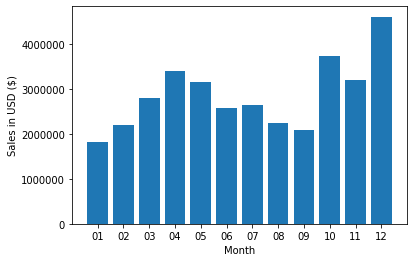

In [3]:
#Removemos los duplicas
print("Cantidad de filas en base de datos: %s" % df.shape[0])
df.drop_duplicates(subset =["Product","Quantity Ordered","Order Date","Purchase Address"],inplace=True, keep=False)
print("Cantidad de filas en base de datos post remoción filas corruptas %s" %df.shape[0])
#Removemos nans
df.dropna(inplace=True)

#Obtenemos columna "meses" para generar vista por grupo
df["Month"] = df.apply(lambda x: x["Order Date"].split("/")[0], axis=1)

#Obtenemos monto total de la compra
df["Total_amount"] = df.apply(lambda x: int(x["Quantity Ordered"]) * float(x["Price Each"]),axis=1)

#Ventas por meses
ventas_mes = df.groupby(['Month'])['Total_amount'].sum()
print("Mayores ventas obtenidas en el mes °%s con un total de $%s USD" %(ventas_mes.idxmax(),round(ventas_mes.loc[ventas_mes.idxmax()],2)))

plt.bar(ventas_mes.index,ventas_mes)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month")
plt.show()

### Pregunta 2) ¿Qué ciudad tuvo la mayor cantidad de ventas?

Mayores ventas obtenidas en la ciudad ('CA', ' San Francisco') con un total de $8247283.19 USD


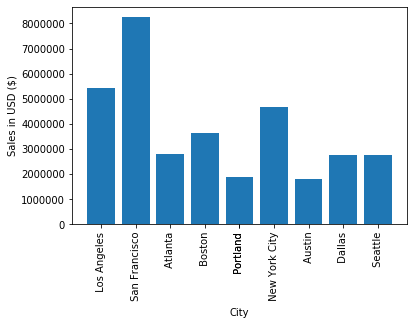

In [4]:
#Obtenemos columna "ciuad" y columna "estado" para generar vista por grupo
df["City"] = df.apply(lambda x: x["Purchase Address"].split(",")[1], axis=1)
df["State"] = df.apply(lambda x: x["Purchase Address"].split(",")[2][1:3], axis=1)

#Ventas por ciudad
ventas_ciudad = df.groupby(["State",'City'])['Total_amount'].sum()
print("Mayores ventas obtenidas en la ciudad %s con un total de $%s USD" %(ventas_ciudad.idxmax(),round(ventas_ciudad.loc[ventas_ciudad.idxmax()],2)))
ventas_ciudad = df.groupby(["State",'City'],as_index=False)['Total_amount'].sum()

#Grafica
plt.bar(ventas_ciudad["City"],ventas_ciudad["Total_amount"])
plt.xticks(ventas_ciudad["City"], rotation="vertical")
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")
plt.show()

### Pregunta 3) ¿A qué hora conviene mostrar publicidad para maximizar las chances de que cliente compre el prducto?

In [6]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [7]:
df["Hour"] = df["Order Date"].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_amount,City,State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,MA,22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA,9


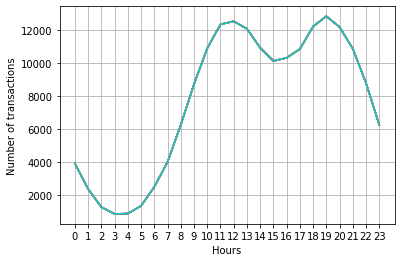

In [8]:
#TRUCO para asegurar orden de etiquetas eje X!
hours = [hour for hour, dataframe in df.groupby("Hour")]

plt.plot(hours, df.groupby(["Hour"]).count())
plt.xticks(hours)
plt.grid()
plt.ylabel("Number of transactions")
plt.xlabel("Hours")
plt.show()

### Pregunta 3) Que tipo de productos se venden en mayor cantidad juntos

En primer lugar debemos identificar los productos que fueron parte de una misma transacción con el Order Id

In [18]:
df_big_orders = df[df.duplicated(subset = ["Order ID"], keep=False)]
print("Hubo %s ordenes con más de un item comprado" %df_big_orders.shape[0])
df_big_orders.head()

Hubo 14116 ordenes con más de un item comprado


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_amount,City,State,Hour
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA,14
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles,CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles,CA,19
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,5.98,San Francisco,CA,17


Transformamos el dataframe para que cada order id sea una sola fila

In [22]:
df_transposed = df_big_orders.pivot_table(index= ['Order ID'], 
                               columns=df.groupby(['Order ID']).cumcount() + 1, 
                               values=['Product'], aggfunc='first')
df_transposed.columns = ['_'.join((col[0], str(col[1]))) for col in df_transposed]
df_transposed.head()

,Product_1,Product_2,Product_3,Product_4,Product_5
Order ID,,,,,
141275,USB-C Charging Cable,Wired Headphones,NaN,NaN,NaN
141290,Apple Airpods Headphones,AA Batteries (4-pack),NaN,NaN,NaN
141365,Vareebadd Phone,Wired Headphones,NaN,NaN,NaN
141384,Google Phone,USB-C Charging Cable,NaN,NaN,NaN
141450,Google Phone,Bose SoundSport Headphones,NaN,NaN,NaN
